BZAN 542

Charles Liu

# Attaching packages

In [1]:
library(lattice) # this imports some visualization functions
library(dplyr) # powerful gramma for data manipulation


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Example: 2006 Birth Data 

427,323 records and 13 variables, including the day of birth according to the month and the day of week (DOB_MM, DOB_WK), the birth weight of the baby (DBWT) and the weight gain of the mother during pregnancy (WTGAIN), the sex of the baby and its APGAR score at birth (SEX and APGAR5), whether it was a single or multiple birth (DPLURAL), and the estimated gestation age in weeks (ESTGEST).

In [2]:
load(file = "births2006.smpl.rda")

In [3]:
names(births2006.smpl) # ?names
dim(births2006.smpl) # ?dim

[1] "DOB_MM"    "DOB_WK"    "MAGER"     "TBO_REC"   "WTGAIN"    "SEX"      
 [7] "APGAR5"    "DMEDUC"    "UPREVIS"   "ESTGEST"   "DMETH_REC" "DPLURAL"  
[13] "DBWT"

[1] 427323     13

In [4]:
births2006.smpl[1:5,] # first five rows

,DOB_MM,DOB_WK,MAGER,TBO_REC,WTGAIN,SEX,APGAR5,DMEDUC,UPREVIS,ESTGEST,DMETH_REC,DPLURAL,DBWT
,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<fct>,<int>
591430,9,1,25,2,NA,F,NA,NULL,10,99,Vaginal,1 Single,3800
1827276,2,6,28,2,26,M,9,2 years of college,10,37,Vaginal,1 Single,3625
1705673,2,2,18,2,25,F,9,NULL,14,38,Vaginal,1 Single,3650
3368269,10,5,21,2,6,M,9,NULL,22,38,Vaginal,1 Single,3045
2990253,7,7,25,1,36,M,10,2 years of high school,15,40,Vaginal,1 Single,3827



    1     2     3     4     5     6     7 
40274 62757 69775 70290 70164 68380 45683 

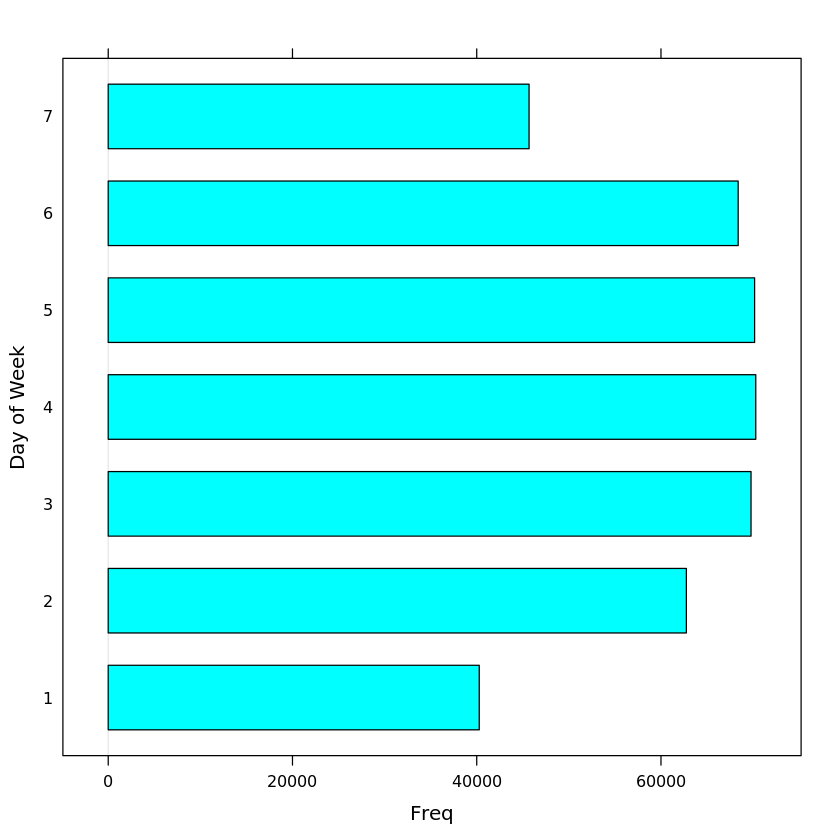

In [5]:
births2006.dow=table(births2006.smpl$DOB_WK) # ?table
births2006.dow
barchart(births2006.dow, ylab="Day of Week")

   MM
WK  C-section Unknown Vaginal
  1      8836      90   31348
  2     20454     272   42031
  3     22921     247   46607
  4     23103     252   46935
  5     22825     258   47081
  6     23233     289   44858
  7     10696     109   34878

   MM
WK  C-section Vaginal
  1      8836   31348
  2     20454   42031
  3     22921   46607
  4     23103   46935
  5     22825   47081
  6     23233   44858
  7     10696   34878

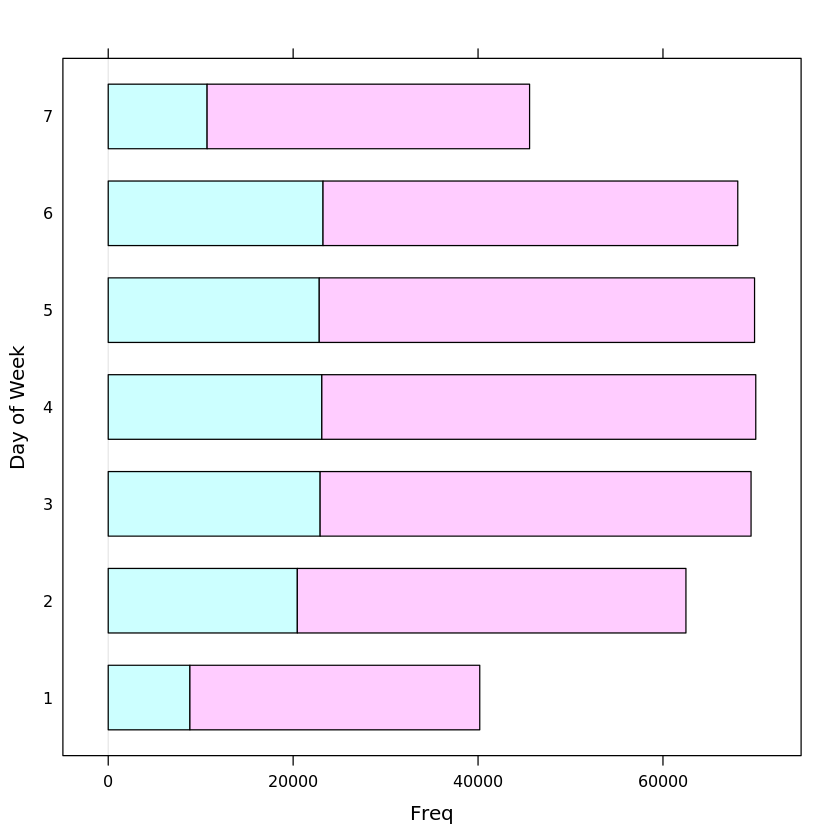

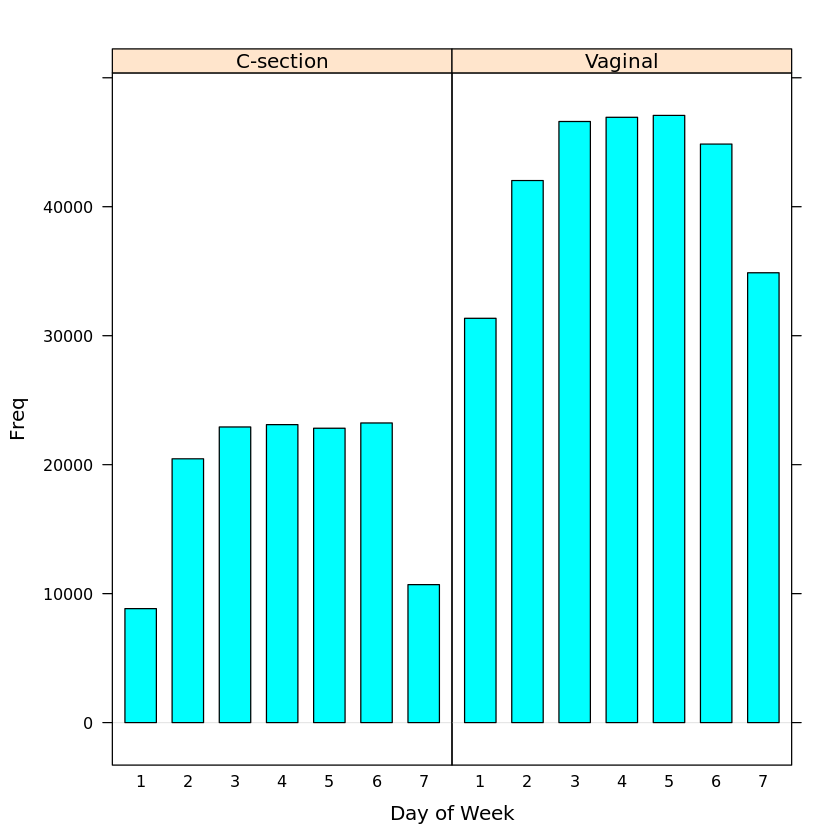

In [6]:
dob.dm.tbl=table(WK=births2006.smpl$DOB_WK, MM=births2006.smpl$DMETH_REC)
dob.dm.tbl
dob.dm.tbl=dob.dm.tbl[,-2] # remove the second column from table
dob.dm.tbl
barchart(dob.dm.tbl, ylab="Day of Week")
barchart(dob.dm.tbl, horizontal=FALSE, groups=FALSE, xlab="Day of Week")

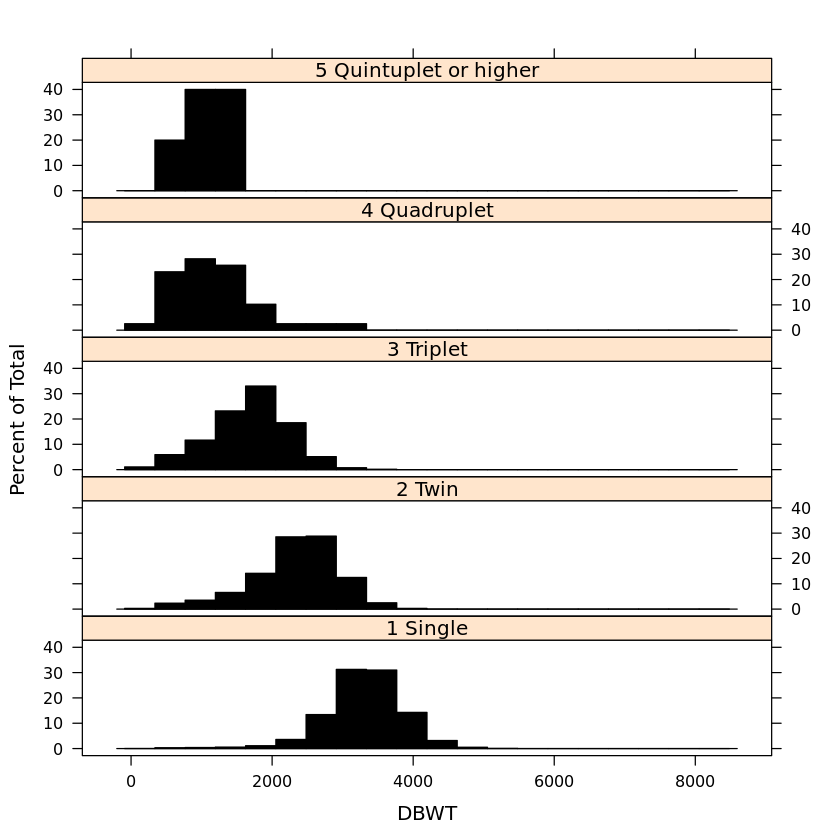

In [7]:
histogram(~DBWT|DPLURAL, data=births2006.smpl, layout=c(1,5), col="black")

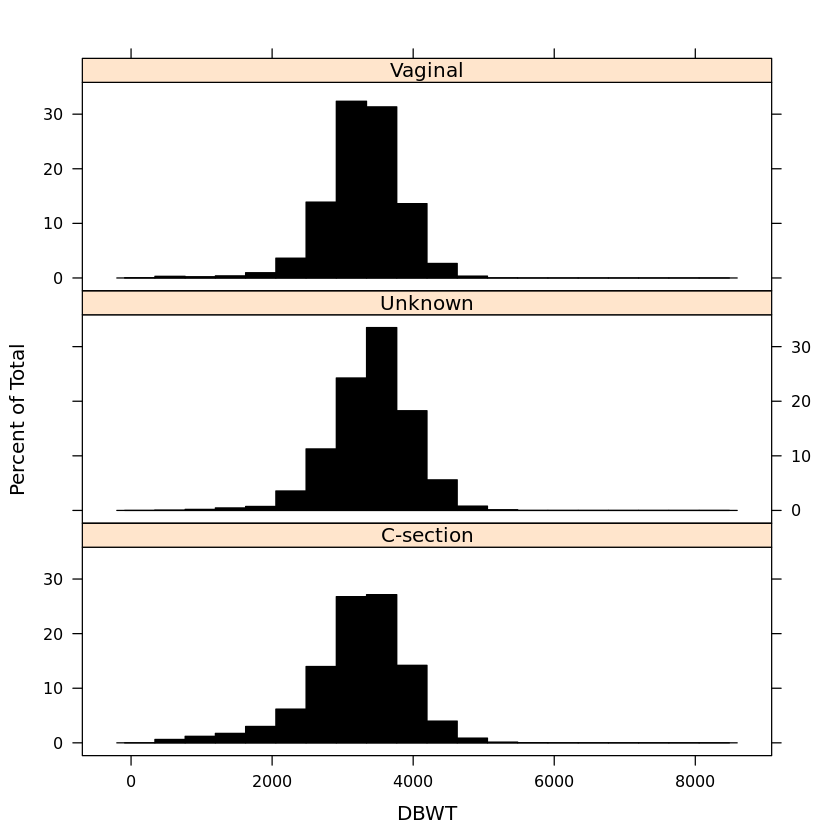

In [8]:
histogram(~DBWT|DMETH_REC, data=births2006.smpl, layout=c(1,3), col="black")

# Example: Alumni Donations

In [9]:
don <- read.csv("contribution.csv")
names(don)
don[1:5,]

[1] "Gender"          "Class.Year"      "Marital.Status"  "Major"          
 [5] "Next.Degree"     "FY04Giving"      "FY03Giving"      "FY02Giving"     
 [9] "FY01Giving"      "FY00Giving"      "AttendenceEvent"

,Gender,Class.Year,Marital.Status,Major,Next.Degree,FY04Giving,FY03Giving,FY02Giving,FY01Giving,FY00Giving,AttendenceEvent
,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,M,1957,M,History,LLB,2500,2500,1400,12060,12000,1
2,M,1957,M,Physics,MS,5000,5000,5000,5000,10000,1
3,F,1957,M,Music,NONE,5000,5000,5000,5000,10000,1
4,M,1957,M,History,NONE,0,5100,200,200,0,1
5,M,1957,M,Biology,MD,1000,1000,1000,1005,1000,1



1957 1967 1977 1987 1997 
 127  222  243  277  361 

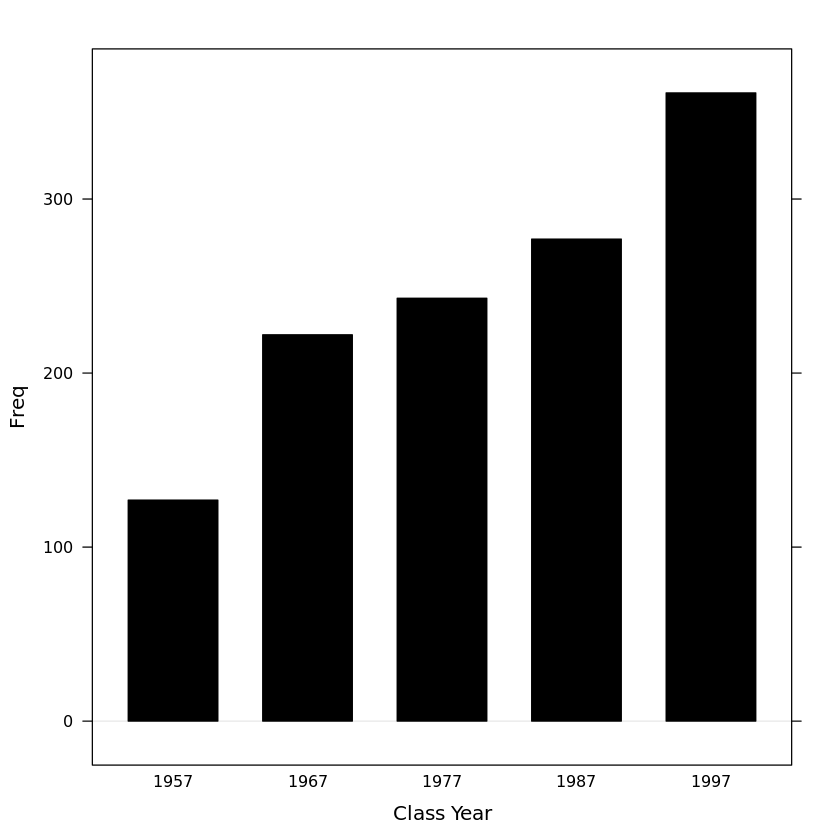

In [10]:
table(don$Class.Year) # frequency of each year
barchart(table(don$Class.Year), horizontal=FALSE, xlab="Class Year", col="black")

In [11]:
don$Total=rowSums(select(don, ends_with("Giving"))) # total giving
mean(don$Total)
sd(don$Total)

[1] 980.0436

[1] 6670.773

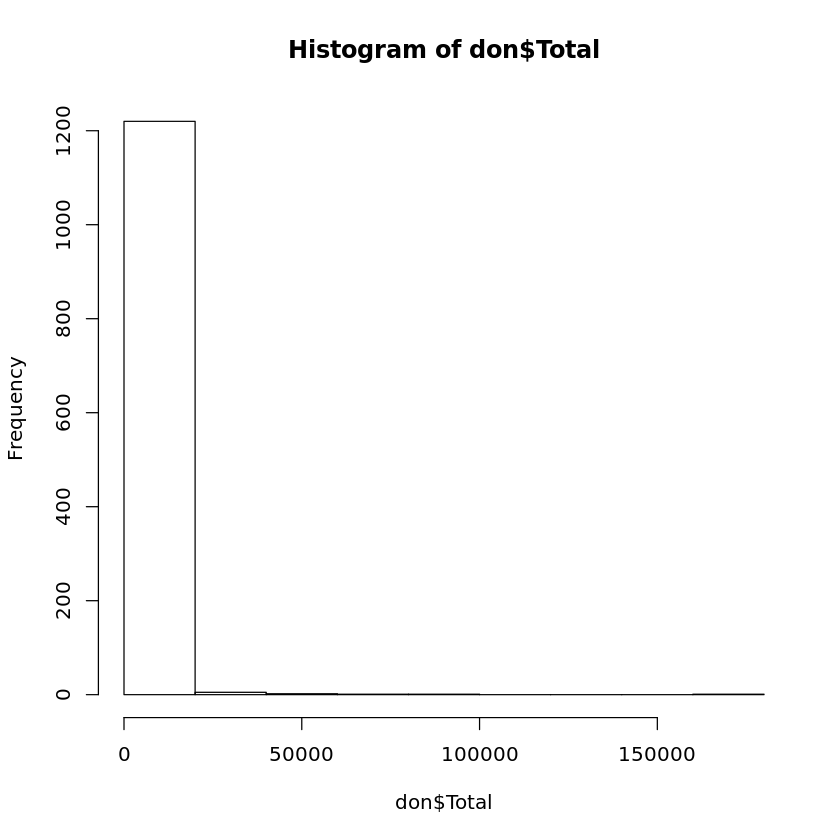

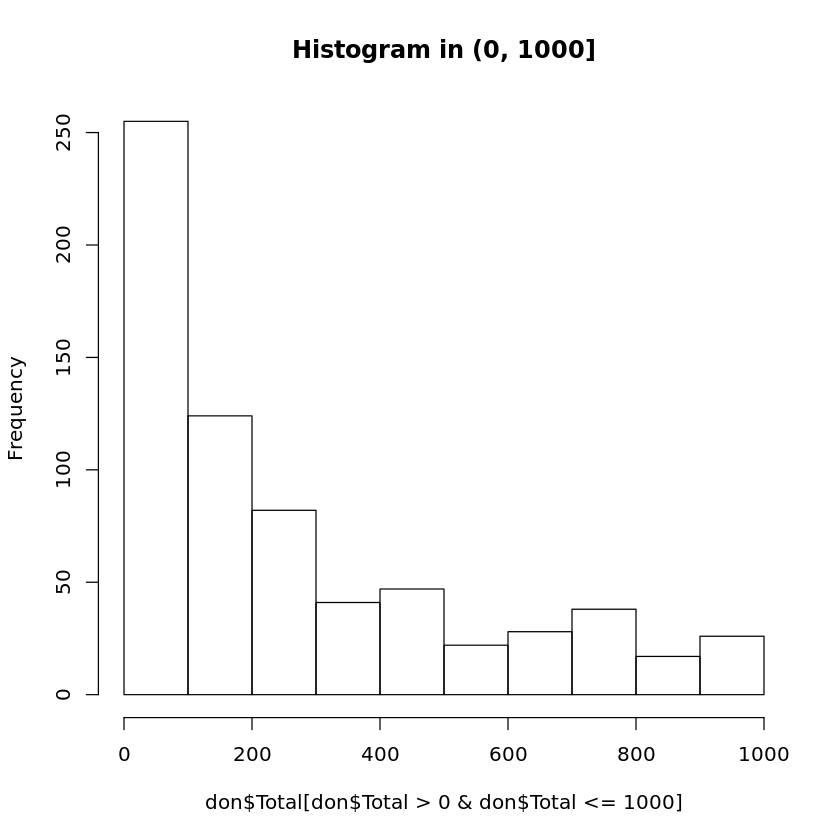

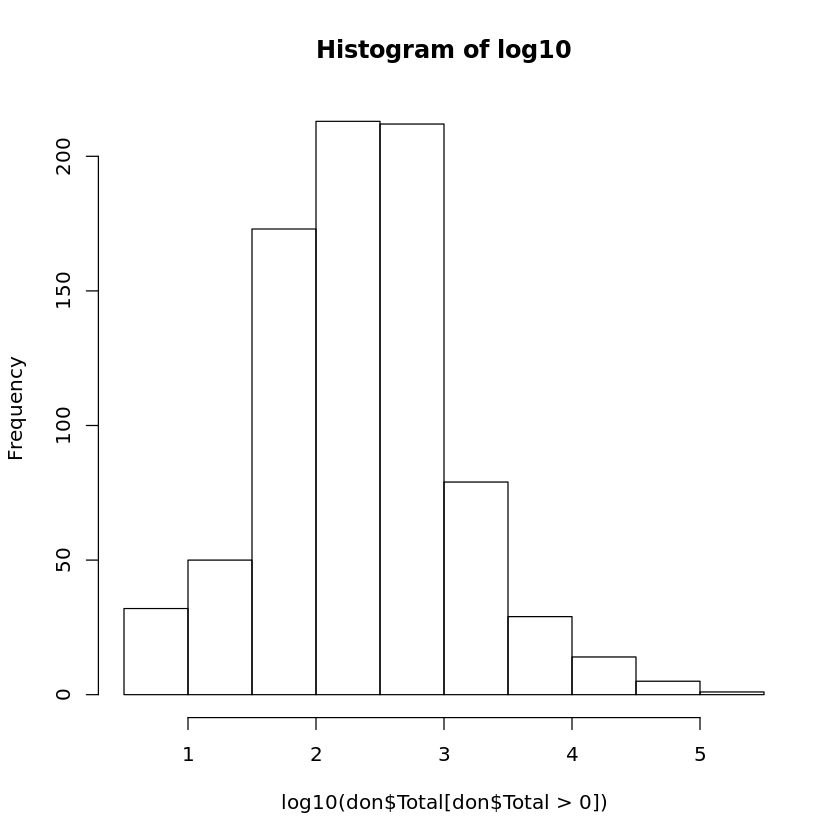

In [25]:
hist(don$Total)
hist(don$Total[don$Total>0 & don$Total<=1000], main = 'Histogram in (0, 1000]')
hist(log10(don$Total[don$Total>0]), main = 'Histogram of log10')

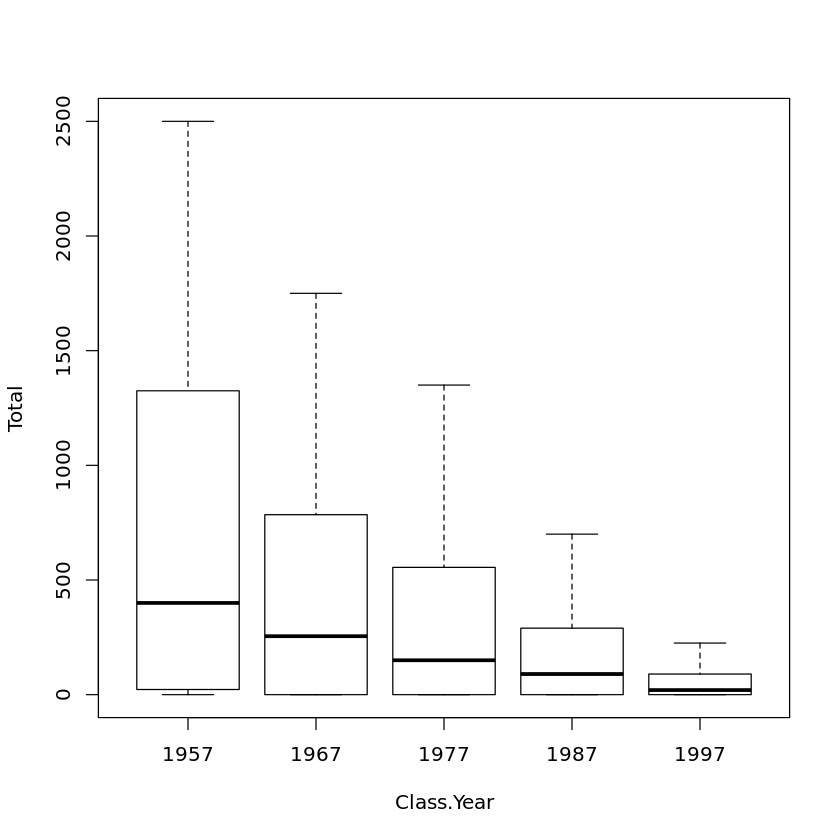

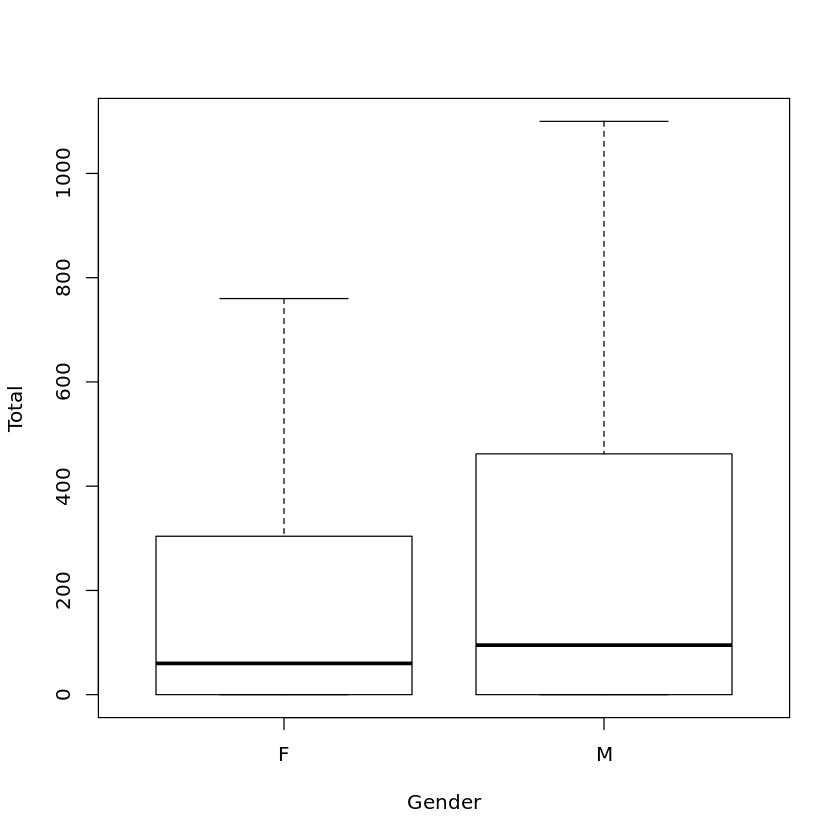

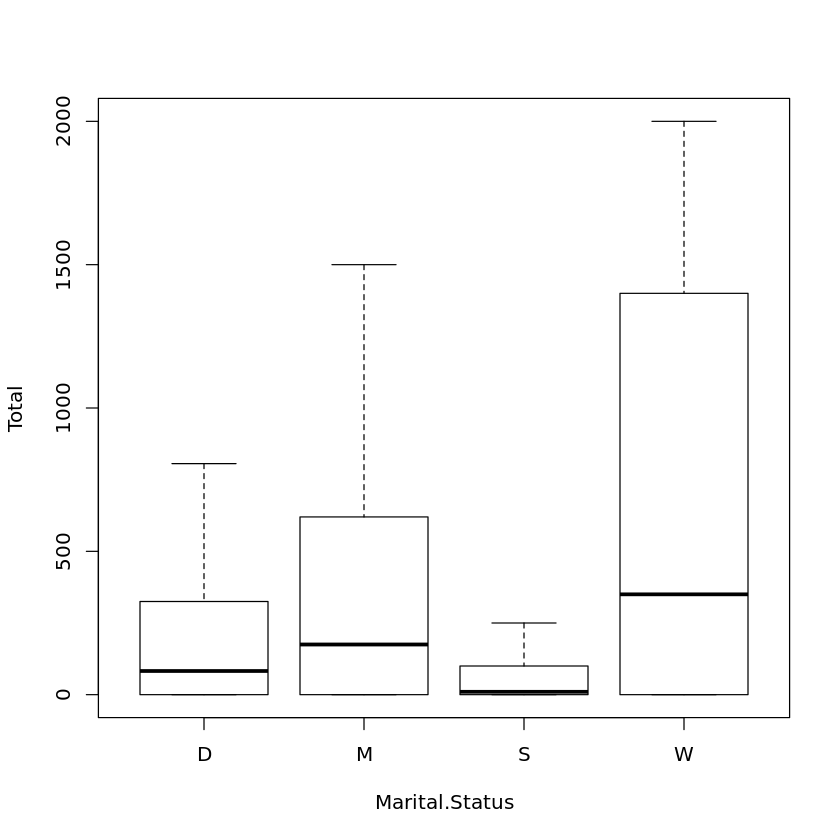

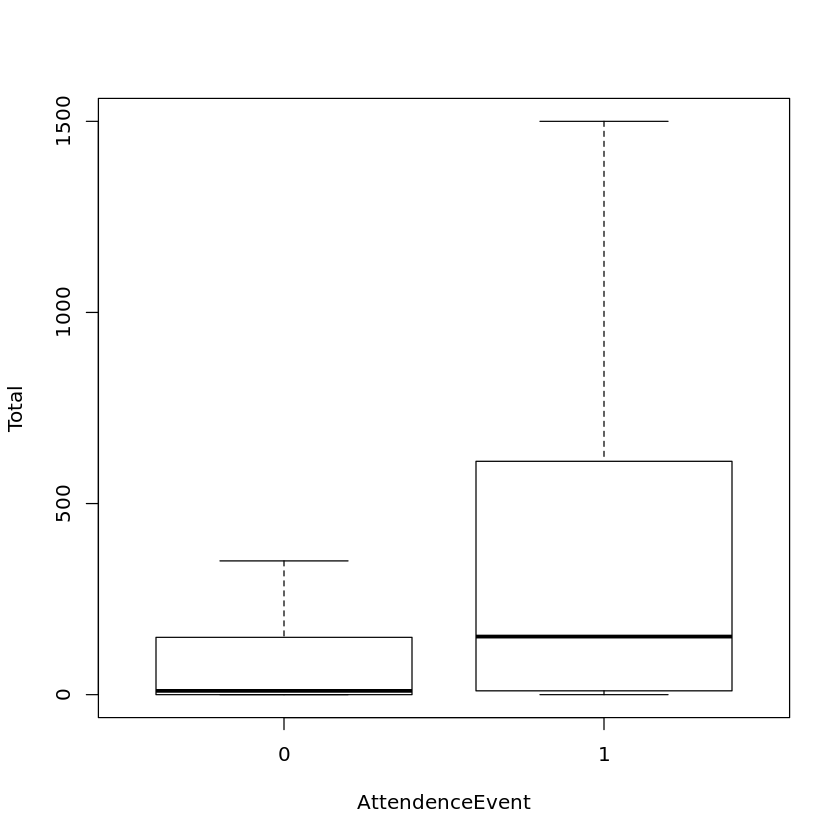

In [13]:
boxplot(Total~Class.Year, data=don, outline=FALSE)
boxplot(Total~Gender, data=don, outline=FALSE)
boxplot(Total~Marital.Status, data=don, outline=FALSE)
boxplot(Total~AttendenceEvent, data=don, outline=FALSE)

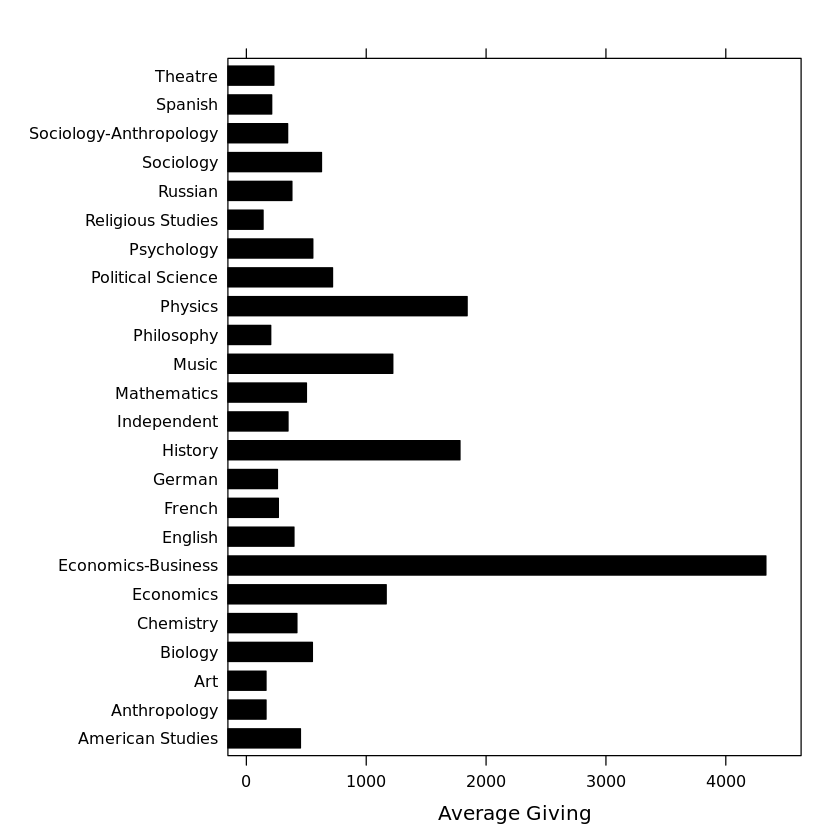

In [14]:
t4=tapply(don$Total, don$Major, mean, na.rm=TRUE) # average by group
t5=table(don$Major) # frequency by group
t6=cbind(t4,t5) # combine average and frequency
t7=t6[t6[,2]>10,] # filter for frequency larger than 10
barchart(t7[,1], xlab='Average Giving', col="black")

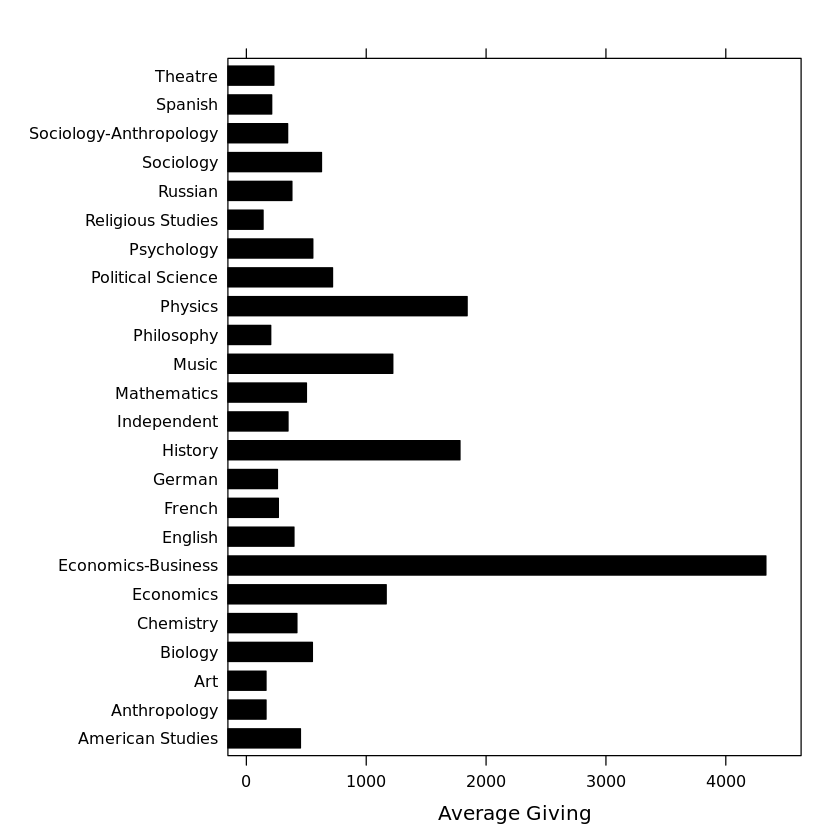

In [15]:
# elegant gramma: group -> summarize -> filter
gs = don %>%
    group_by(Major) %>%
    summarize(n=n(), m=mean(Total)) %>%
    filter(n>10)
barchart(setNames(gs$m, gs$Major), xlab='Average Giving' , col="black")

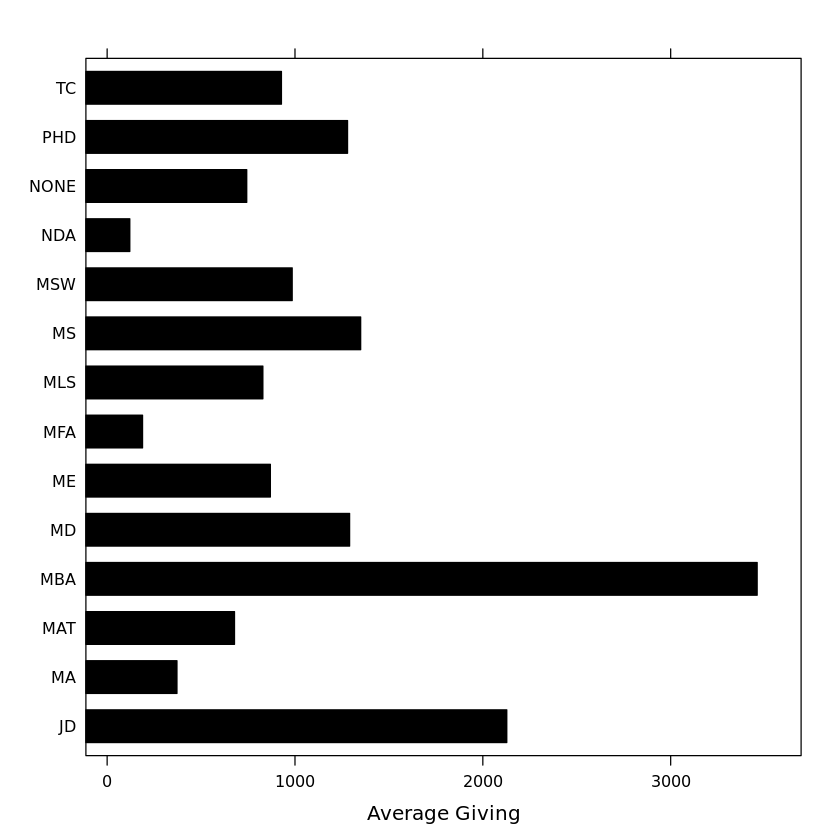

In [16]:
t4=tapply(don$Total, don$Next.Degree, mean, na.rm=TRUE)
t5=table(don$Next.Degree)
t6=cbind(t4,t5)
t7=t6[t6[,2]>10,]
barchart(t7[,1], xlab='Average Giving', col="black")

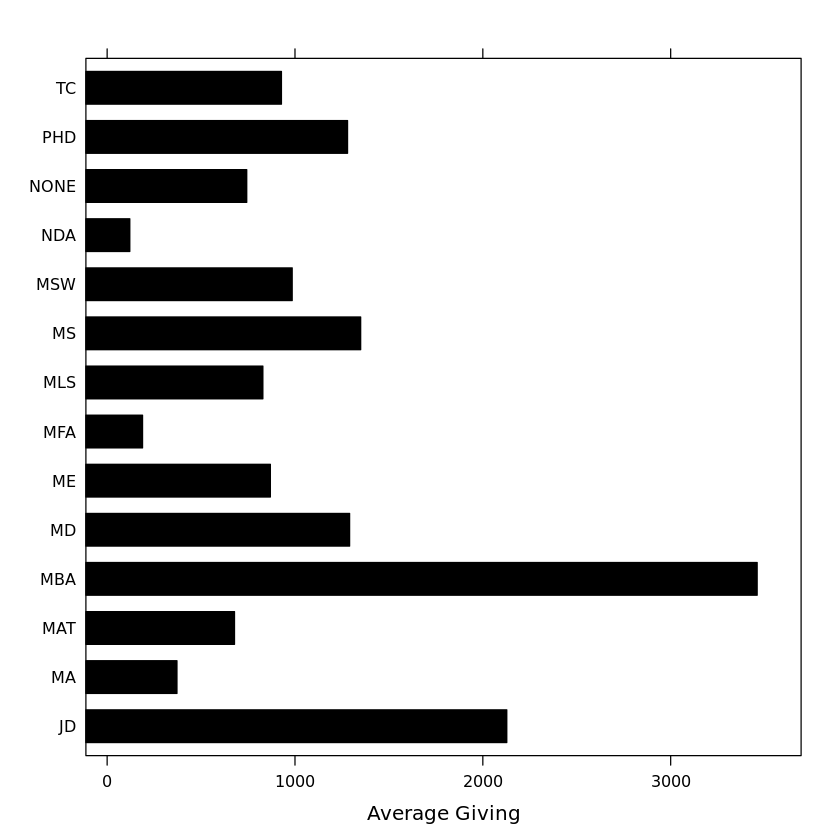

In [17]:
gs = don %>%
    group_by(Next.Degree) %>%
    summarize(n=n(), m=mean(Total)) %>%
    filter(n>10)
barchart(setNames(gs$m, gs$Next.Degree), xlab='Average Giving' , col="black")